# Support Vector Machine (SVM) - Multiclass Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

### 1. Data Processing:

a) Import the data: You are provided separate .csv files for train and test.

Train shape: (507, 148)
Test shape: (168, 148)

In [4]:
print("a) Importing data...")
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

print(f"Train shape: {train_data.shape}") 
print(f"Test shape: {test_data.shape}") 

a) Importing data...
Train shape: (507, 148)
Test shape: (168, 148)


b) Remove any rows that have missing data across both sets of data.

In [5]:
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

print(f"Train shape after removing missing data: {train_data_clean.shape}")
print(f"Test shape after removing missing data: {test_data_clean.shape}")

Train shape after removing missing data: (507, 148)
Test shape after removing missing data: (168, 148)


c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test".

In [6]:
y_train = train_data_clean['class']
X_train = train_data_clean.drop('class', axis=1)

y_test = test_data_clean['class']
X_test = test_data_clean.drop('class', axis=1)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (507, 147)
y_train shape: (507,)
X_test shape: (168, 147)
y_test shape: (168,)


In [7]:
print("\nClass distribution in training data:")
print(y_train.value_counts())
print("\nClass distribution in test data:")
print(y_test.value_counts())


Class distribution in training data:
class
building     97
concrete     93
tree         89
grass        83
shadow       45
asphalt      45
car          21
soil         20
pool         14
Name: count, dtype: int64

Class distribution in test data:
class
grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: count, dtype: int64


d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Print scaled features statistics
print("\nScaled features statistics:")
print(pd.DataFrame(X_train_scaled).describe())


Scaled features statistics:
                0             1             2             3             4    \
count  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02   
mean   3.854029e-16  9.109522e-17 -3.118260e-16 -3.556217e-16  2.802930e-16   
std    1.000988e+00  1.000988e+00  1.000988e+00  1.000988e+00  1.000988e+00   
min   -1.658016e+00 -7.744002e-01 -2.204310e+00 -2.196714e+00 -1.359473e+00   
25%   -7.204800e-01 -5.781155e-01 -7.081406e-01 -6.035918e-01 -6.150777e-01   
50%   -1.223968e-01 -3.431470e-01 -4.911349e-02  7.974018e-02 -2.142494e-01   
75%    5.726729e-01  1.704884e-01  5.831963e-01  9.373681e-01  3.469102e-01   
max    4.048021e+00  7.456661e+00  4.065353e+00  1.270525e+00  6.737258e+00   

                5             6             7             8             9    \
count  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02   
mean  -5.605860e-17  2.680302e-16 -2.557674e-16  8.671564e-17 -2.102197e-16   
std    1.000988e+00  1

### 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare SVMs to Random Forest in multiclass problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [13]:
print("a) Creating and fitting Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

a) Creating and fitting Random Forest model...


RandomForestClassifier(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [15]:
rf_test_pred = rf_model.predict(X_test_scaled)

c) Calculate the confusion matrix and classification report for the test data. 


Confusion Matrix (Test Data):


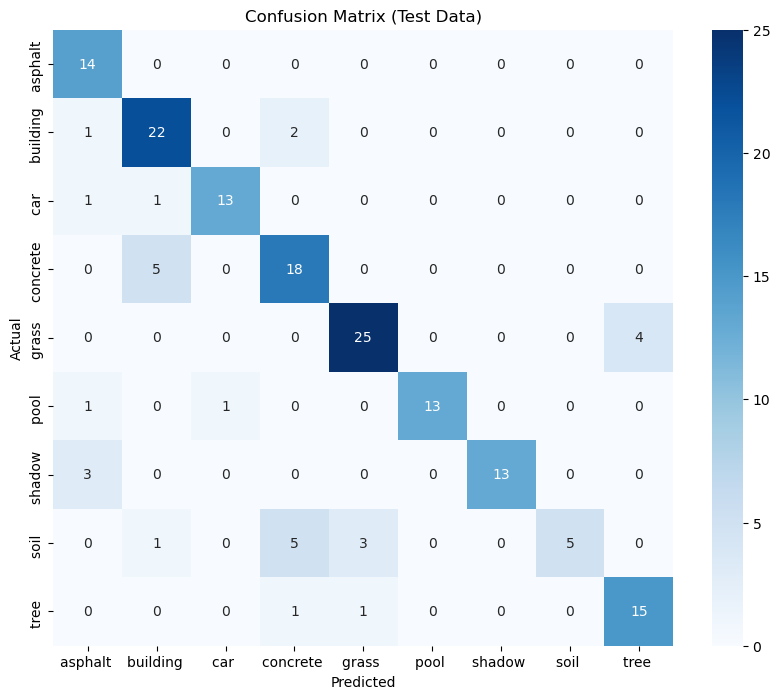


Classification Report (Test Data):
              precision    recall  f1-score   support

    asphalt        0.70      1.00      0.82        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.69      0.78      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.36      0.53        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.82       168
   macro avg       0.86      0.81      0.81       168
weighted avg       0.85      0.82      0.82       168



In [18]:
print("\nConfusion Matrix (Test Data):")
cm_test = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

print("\nClassification Report (Test Data):")
cr_test = classification_report(y_test, rf_test_pred)
print(cr_test)

d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

e) Identify the top 5 features. Feel free to print a list OR to make a plot. 